In [1]:
#Import job data
import pandas as pd
from pandas import DataFrame
import json

data = []

with open("/Users/ryancramer/Desktop/handshake_feed1.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df1 = pd.DataFrame(data)

data = []

with open("/Users/ryancramer/Desktop/courses.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df2 = pd.DataFrame(data)


df_skill = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/SkillsSet5.csv")

skill5 = list()
df_skill = df_skill["0"]
for word in df_skill:
    #print(word)
    skill5.append(word)

#train_texts = df4['description']

In [2]:
jobs = df1['description']
courses = df2['description']

jobs

In [3]:

#print(courses[4973])
#print(jobs[222])

In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        alpha_tokens = [i for i in stopped_tokens if i.isalpha()]
        # alpha tokens only
        stemmed_tokens = [p_stemmer.stem(i) for i in alpha_tokens]
        # add tokens to list
        texts.append((" ").join(stemmed_tokens))
    return texts

In [5]:
def ngram(doc_set):
    texts = []
    for i in doc_set:
        text_with_grams = []
        count = 1
        holder = ""
        words = i.split()
        for word in words:
            if count == 1:
                holder = word
            else:  
                text_with_grams.append(holder + " " + word)
                text_with_grams.append(holder)
                if count == len(words):
                    text_with_grams.append(word)
                holder = word
            count = count + 1
        texts.append(text_with_grams)
    return texts



"this is a test"
"this is, this, is a, is, a test, a ,test"

In [6]:
def SkillConverter(jobs,skills):
    texts = []
    for job in jobs:
        skill_text = []
        skip_gram = False
        for word in job:
            if skip_gram == True:
                skip_gram = False
                continue
            elif skip_gram == False and word in skills:
                skill_text.append(word)
                skip_gram = True
        texts.append((" ").join(skill_text))
    return texts

In [7]:
%%time
jobs_processed = preprocess_data(jobs)
jobs_ngram = ngram(jobs_processed)

CPU times: user 6.12 s, sys: 65.7 ms, total: 6.19 s
Wall time: 6.45 s


print(courses)

In [8]:
%%time
courses_processed = preprocess_data(courses)

CPU times: user 36.3 s, sys: 277 ms, total: 36.6 s
Wall time: 37.5 s


In [9]:
courses_ngram = ngram(courses_processed)

In [10]:
%%time
#skills = ["java", "python", "microsoft excel", "microsoft suite"]
jobs_skills = SkillConverter(jobs_ngram,skill5)
    

CPU times: user 56 s, sys: 339 ms, total: 56.3 s
Wall time: 57.4 s


In [11]:
%%time
courses_skills = SkillConverter(courses_ngram,skill5)

CPU times: user 6min 43s, sys: 2.54 s, total: 6min 45s
Wall time: 6min 54s


skills = ["java excel", "python"]

In [12]:
"""
#SkillConverter test
skills = ["java excel", "python"]
role = [['java excel', 'java', 'is a', 'is', 'a test', 'python', 'test'], ['this is', 'this', 'is a', 'python', 'a python', 'python', 'test']]
print(SkillConverter(role,skills))
"""

'\n#SkillConverter test\nskills = ["java excel", "python"]\nrole = [[\'java excel\', \'java\', \'is a\', \'is\', \'a test\', \'python\', \'test\'], [\'this is\', \'this\', \'is a\', \'python\', \'a python\', \'python\', \'test\']]\nprint(SkillConverter(role,skills))\n'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words = 'english')
count_vectorizer = CountVectorizer()
jobs_matrix = count_vectorizer.fit_transform(jobs_skills)
courses_matrix = count_vectorizer.transform(courses_skills)

tfidf_vectorizer = TfidfVectorizer()
jobs_matrix2 = tfidf_vectorizer.fit_transform(jobs_skills)
courses_matrix2 = tfidf_vectorizer.transform(courses_skills)


In [14]:
"""
#vec.reshape(1,-1)
#print(jobs_matrix)
job_shape = jobs_matrix.reshape(1,-1)
course_shape = courses_matrix.reshape(1,-1)

print(job_shape)
"""

'\n#vec.reshape(1,-1)\n#print(jobs_matrix)\njob_shape = jobs_matrix.reshape(1,-1)\ncourse_shape = courses_matrix.reshape(1,-1)\n\nprint(job_shape)\n'

In [15]:
#from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics.pairwise import pairwise_distances

In [16]:
#pairwise_distances(X, Y=None, metric='euclidean', *, n_jobs=None, force_all_finite=True, **kwds)

In [ ]:
#count
sim = 1-pairwise_distances(jobs_matrix,courses_matrix, metric='cosine')

In [34]:
#tfidf
sim2 = 1-pairwise_distances(jobs_matrix2,courses_matrix2, metric='cosine')

In [35]:
#jobs to jobs using tfidf
sim3 = 1-pairwise_distances(jobs_matrix2,jobs_matrix2, metric='cosine')

In [36]:
sim_flat = sim.flatten()

In [37]:
sim_flat2 = sim2.flatten()

In [68]:
sim_flat3 = sim3.flatten()

In [20]:
#sim2.sort()

In [21]:
#sim2[7692154]

In [54]:
#sim, job, course
total_sim = []
count1 = 0
for word in sim:
    count2 = 0
    for similarity in word:
        context = [similarity,count1,count2]
        total_sim.append(context)
        count2 = count2 + 1
    count1 = count1 + 1
total_sim.sort()
total_sim.reverse()

In [55]:
print(total_sim[0:10])

[[0.7871246517492032, 574, 79], [0.761403684526865, 574, 8439], [0.758753302230423, 222, 4973], [0.7582622491133683, 696, 5881], [0.7504014042621929, 467, 1210], [0.7484723204842588, 696, 4691], [0.7331236668324068, 521, 6904], [0.7284402931108824, 751, 1903], [0.722897396012249, 15, 2597], [0.7193211875108543, 79, 4932]]


In [64]:
for word in total_sim[0:10]:
    print(word[0])

0.7871246517492032
0.761403684526865
0.758753302230423
0.7582622491133683
0.7504014042621929
0.7484723204842588
0.7331236668324068
0.7284402931108824
0.722897396012249
0.7193211875108543


In [56]:
#sim, job, course
total_sim2 = []
count1 = 0
for word in sim2:
    count2 = 0
    for similarity in word:
        context = [similarity,count1,count2]
        total_sim2.append(context)
        count2 = count2 + 1
    count1 = count1 + 1
total_sim2.sort()
total_sim2.reverse()

In [57]:
print(total_sim2[0:10])

[[0.8401405613985957, 15, 2597], [0.8265190188618802, 200, 6074], [0.825959448025467, 751, 1903], [0.8198903515288931, 200, 2380], [0.8152366944718417, 769, 123], [0.8137172351096656, 574, 79], [0.8042811432486665, 15, 3318], [0.7964097943766762, 751, 3730], [0.7959935764185051, 769, 2973], [0.7941512440504568, 58, 1371]]


In [65]:
for word in total_sim2[0:10]:
    print(word[0])

0.8401405613985957
0.8265190188618802
0.825959448025467
0.8198903515288931
0.8152366944718417
0.8137172351096656
0.8042811432486665
0.7964097943766762
0.7959935764185051
0.7941512440504568


In [66]:
#print(courses[6074])
#print(jobs[200])

In [67]:
#print(courses[4973])
#print(jobs[222])

In [43]:
#new 1 tfidf
df_C = pd.DataFrame(sim)
df_C

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.064432,0.032142,0.036986,0.075653,0.000000,0.022163,0.034204,0.102170,0.122101,0.050138,...,0.105227,0.078897,0.121268,0.000000,0.323381,0.0,0.091539,0.000000,0.080845,0.130449
1,0.067346,0.214105,0.102375,0.091277,0.064550,0.041291,0.081432,0.096959,0.177821,0.057646,...,0.302460,0.095751,0.116190,0.001339,0.216887,0.0,0.058471,0.002416,0.116190,0.151944
2,0.067623,0.114176,0.010949,0.111975,0.107694,0.019683,0.198819,0.132212,0.082410,0.017810,...,0.147960,0.049046,0.008974,0.000000,0.172310,0.0,0.195103,0.000000,0.071796,0.034073
3,0.054064,0.000000,0.097538,0.055419,0.053300,0.004871,0.016400,0.000000,0.025760,0.026444,...,0.000000,0.041613,0.106600,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.080944
4,0.153923,0.133037,0.016614,0.073630,0.027237,0.012445,0.090091,0.121949,0.174416,0.101349,...,0.342692,0.143534,0.149802,0.000000,0.206999,0.0,0.080183,0.000000,0.115756,0.217157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.066331,0.076263,0.049641,0.059230,0.000000,0.026958,0.070424,0.044076,0.081119,0.050469,...,0.105921,0.035738,0.035603,0.002110,0.146482,0.0,0.023036,0.000000,0.076293,0.069517
872,0.112512,0.032566,0.051007,0.096878,0.047782,0.013099,0.095564,0.041407,0.083712,0.005927,...,0.067375,0.032641,0.119455,0.000000,0.277135,0.0,0.108205,0.000000,0.077646,0.068029
873,0.098232,0.123208,0.016541,0.124054,0.027116,0.002478,0.037546,0.070496,0.111395,0.067267,...,0.223529,0.052926,0.162698,0.000000,0.303703,0.0,0.159656,0.000000,0.094907,0.082361
874,0.020048,0.022451,0.048224,0.065760,0.039528,0.019867,0.063854,0.025691,0.076416,0.019612,...,0.094324,0.046291,0.049411,0.006150,0.079057,0.0,0.098466,0.000000,0.098821,0.255128


In [44]:
df_T = pd.DataFrame(sim2)
df_T

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.020845,0.015435,0.017796,0.052867,0.000000,0.013690,0.026220,0.048962,0.062396,0.036647,...,0.031611,0.062477,0.099713,0.000000,0.073826,0.0,0.065445,0.000000,0.049029,0.046376
1,0.025077,0.169839,0.040971,0.038088,0.025478,0.035784,0.048187,0.067439,0.075801,0.026897,...,0.092547,0.035773,0.070595,0.000978,0.040414,0.0,0.053746,0.001758,0.077368,0.061901
2,0.040958,0.097104,0.010642,0.068556,0.039677,0.012851,0.132710,0.062141,0.020321,0.015506,...,0.043522,0.030904,0.002285,0.000000,0.029416,0.0,0.130721,0.000000,0.069694,0.030540
3,0.050549,0.000000,0.042095,0.013934,0.019010,0.005141,0.004490,0.000000,0.006073,0.024914,...,0.000000,0.010195,0.057026,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.048260
4,0.062798,0.091859,0.012275,0.056713,0.018859,0.010652,0.054733,0.070585,0.077090,0.060084,...,0.108148,0.083973,0.064575,0.000000,0.088947,0.0,0.029551,0.000000,0.078469,0.089600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.031867,0.055497,0.016816,0.027883,0.000000,0.016014,0.044229,0.025642,0.035740,0.026777,...,0.051454,0.016521,0.025046,0.000711,0.027806,0.0,0.012101,0.000000,0.047201,0.034288
872,0.042754,0.022596,0.026855,0.046555,0.013698,0.011668,0.061580,0.017984,0.074558,0.006019,...,0.057362,0.014148,0.059267,0.000000,0.084583,0.0,0.050783,0.000000,0.039607,0.024074
873,0.028235,0.062499,0.005195,0.103830,0.008841,0.005201,0.023537,0.028274,0.044334,0.025869,...,0.084212,0.015574,0.070441,0.000000,0.105511,0.0,0.072814,0.000000,0.035977,0.019557
874,0.016887,0.010239,0.031297,0.044008,0.015447,0.021097,0.057385,0.011535,0.046351,0.009237,...,0.033138,0.020258,0.034635,0.003952,0.024304,0.0,0.082435,0.000000,0.036617,0.085754


In [45]:
#new
df_C2 = pd.DataFrame(sim_flat)
df_C2
#print(df2.sort_values)

,0
0,0.064432
1,0.032142
2,0.036986
3,0.075653
4,0.000000
...,...
7692151,0.000000
7692152,0.087264
7692153,0.000000
7692154,0.108379


In [46]:
df_T2 = pd.DataFrame(sim_flat2)
df_T2
#print(df2.sort_values)

,0
0,0.020845
1,0.015435
2,0.017796
3,0.052867
4,0.000000
...,...
7692151,0.000000
7692152,0.041095
7692153,0.000000
7692154,0.042924


Count Vectorizer
TFIDF Vectorizer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1af7dc5f90>]],
      dtype=object)

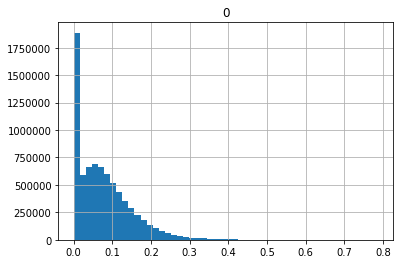

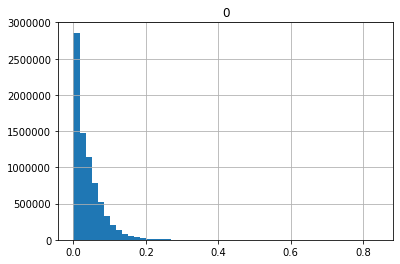

In [53]:
#count vectorizer
bin_size = 50
print("Count Vectorizer")
df_C2.hist(bins=bin_size)
print("TFIDF Vectorizer")
df_T2.hist(bins=bin_size)

In [69]:
df_J = pd.DataFrame(sim3)
df_J

,0,1,2,3,4,5,6,7,8,9,...,866,867,868,869,870,871,872,873,874,875
0,1.000000,0.130323,0.087435,0.019740,0.133701,0.107224,0.093765,0.099087,0.041741,0.092956,...,0.143636,0.153304,0.045934,0.064799,0.138848,0.124324,0.119337,0.061464,0.083911,0.153304
1,0.130323,1.000000,0.135190,0.044829,0.259759,0.228601,0.161521,0.130181,0.116215,0.083359,...,0.101851,0.117313,0.080980,0.099969,0.198696,0.106255,0.052998,0.110723,0.091641,0.117313
2,0.087435,0.135190,1.000000,0.010945,0.128663,0.074031,0.092549,0.090133,0.105710,0.103758,...,0.093906,0.094026,0.079555,0.034473,0.174768,0.069560,0.063547,0.069126,0.044815,0.094026
3,0.019740,0.044829,0.010945,1.000000,0.024911,0.063568,0.053932,0.035388,0.002722,0.008777,...,0.109570,0.115201,0.009921,0.043181,0.065323,0.019693,0.073207,0.009067,0.048677,0.115201
4,0.133701,0.259759,0.128663,0.024911,1.000000,0.225430,0.171352,0.116489,0.246679,0.109821,...,0.166961,0.165810,0.111429,0.086709,0.226007,0.111615,0.069546,0.186599,0.099316,0.165810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.124324,0.106255,0.069560,0.019693,0.111615,0.080428,0.096202,0.096831,0.028887,0.067958,...,0.066568,0.068228,0.059905,0.082780,0.132192,1.000000,0.051024,0.058892,0.086914,0.068228
872,0.119337,0.052998,0.063547,0.073207,0.069546,0.078637,0.072955,0.076944,0.022768,0.052683,...,0.113664,0.113526,0.032654,0.062604,0.113653,0.051024,1.000000,0.157323,0.020841,0.113526
873,0.061464,0.110723,0.069126,0.009067,0.186599,0.159173,0.069454,0.085588,0.016917,0.057532,...,0.086865,0.090478,0.052654,0.058666,0.136834,0.058892,0.157323,1.000000,0.044257,0.090478
874,0.083911,0.091641,0.044815,0.048677,0.099316,0.095928,0.078501,0.068903,0.024164,0.040142,...,0.133431,0.145355,0.039770,0.015106,0.081733,0.086914,0.020841,0.044257,1.000000,0.145355


In [70]:
df_J2 = pd.DataFrame(sim_flat3)
df_J2

,0
0,1.000000
1,0.130323
2,0.087435
3,0.019740
4,0.133701
...,...
767371,0.068228
767372,0.113526
767373,0.090478
767374,0.145355


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a90e28ed0>]],
      dtype=object)

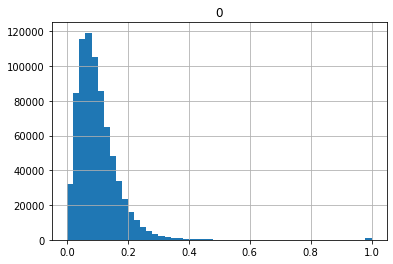

In [71]:
bin_size = 50
df_J2.hist(bins=bin_size)

In [73]:
#sim, job, course
total_sim3 = []
count1 = 0
for word in sim3:
    count2 = 0
    for similarity in word:
        context = [similarity,count1,count2]
        total_sim3.append(context)
        count2 = count2 + 1
    count1 = count1 + 1
total_sim3.sort()
total_sim3.reverse()

In [88]:
count = 1000
for word in total_sim3:
    if word[0] == 1:
        continue
    elif count == 0:
        break
    else:
        print(word)
        count = count - 1

[0.9999999999999999, 624, 623]
[0.9999999999999999, 623, 624]
[0.9999999999999998, 832, 831]
[0.9999999999999998, 832, 830]
[0.9999999999999998, 832, 211]
[0.9999999999999998, 832, 210]
[0.9999999999999998, 831, 832]
[0.9999999999999998, 831, 830]
[0.9999999999999998, 831, 211]
[0.9999999999999998, 831, 210]
[0.9999999999999998, 830, 832]
[0.9999999999999998, 830, 831]
[0.9999999999999998, 830, 211]
[0.9999999999999998, 830, 210]
[0.9999999999999998, 211, 832]
[0.9999999999999998, 211, 831]
[0.9999999999999998, 211, 830]
[0.9999999999999998, 211, 210]
[0.9999999999999998, 210, 832]
[0.9999999999999998, 210, 831]
[0.9999999999999998, 210, 830]
[0.9999999999999998, 210, 211]
[0.9999999999999997, 699, 502]
[0.9999999999999997, 502, 699]
[0.9999999999999997, 53, 52]
[0.9999999999999997, 52, 53]
[0.9990783813804219, 420, 417]
[0.9990783813804219, 417, 420]
[0.9985649945060247, 820, 475]
[0.9985649945060247, 820, 170]
[0.9985649945060247, 475, 820]
[0.9985649945060247, 170, 820]
[0.998234842

In [150]:
hold = 198
print(courses[hold])
print("\n")
print(courses_skills[hold])

Этот курс – первый шаг к пониманию институтов и их роли в экономике и обществе, первый взгляд на богатую идеями и результатами область экономического анализа, которую мы называем институциональной экономикой. Мы покажем, что в мире, где осуществление трансакций связано с издержками, а люди склонны к оппортунизму, необходимо создавать правила и следить за соблюдением этих правил. Такие правила, дополненные механизмами принуждения к следованию правилам, мы и будем называть институтами..	Основная задача курса состоит в том, чтобы показать, как институты работают в различных сферах, и что происходит, если институты являются слабыми или неэффективными. Мы поговорим об институте прав собственности и о контрактах, будем приводить исторические примеры и разбирать современные кейсы, покажем, что институты важны для процветания целых стран, но в то же время необходимы для осуществления даже самых простых трансакций между двумя их гражданами. И это всего лишь неполный перечень вопросов, на которы

In [140]:
hold = 0
print(jobs[hold])
print("\n")
print(jobs_skills[hold])

Employer: Tulane University, Howard-Tilton Memorial Library 

 Expires: 09/21/2019 

 POSITION SUMMARY: The Library Technician for Domestic Ordering in the Acquisitions and Electronic Resources Department reports to the Manager of Acquisitions and manages all aspects of the EBSCO GOBI firm order process. Communicates with GOBI representatives to resolve problems. Handles non-GOBI orders as assigned. Shares GOBI, OCLC and other library knowledge with library employees. REQUIRED EDUCATION AND EXPERIENCE: 1. Bachelor’s degree, or high school diploma/equivalent and 6 years of directly related library experienceREQUIRED KNOWLEDGE, SKILLS, ABILITIES/COMPETENCIES TYPICALLY NEEDED TO PERFORM THIS JOB SUCCESSFULLY: 1. Demonstrated proficiency using Microsoft Excel or other spreadsheet software and a working knowledge of Microsoft Office 2. Ability to communicate effectively and work with diverse vendors and library personnel with varying levels of experience3. Ability to prioritize, organize an

In [90]:
for word in total_sim2[0:10]:
    print(word)

[0.8401405613985957, 15, 2597]
[0.8265190188618802, 200, 6074]
[0.825959448025467, 751, 1903]
[0.8198903515288931, 200, 2380]
[0.8152366944718417, 769, 123]
[0.8137172351096656, 574, 79]
[0.8042811432486665, 15, 3318]
[0.7964097943766762, 751, 3730]
[0.7959935764185051, 769, 2973]
[0.7941512440504568, 58, 1371]


In [151]:
count = 0
for word in total_sim[7692140:7692155]:
    
    if word[0] == 0.0 and word[1] == 0:
        count = count +1
print(count)
    #print(word)

1701


In [138]:
len(total_sim)

7692156

In [152]:
len(courses)

8781

In [154]:
1701/8781

0.1937137000341647

In [156]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in /Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [157]:
import gensim

In [159]:
from gensim import Word2Vec
sentences = ["This is a sentence for a job", "Julia is a woman and like to watch movies"]

model = Word2Vec(sentences)

ImportError: cannot import name 'Word2Vec' from 'gensim' (/Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages/gensim/__init__.py)